# Model Training - Support Vector Machine (SVM)

# 1. Import Required Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import label_binarize
import pickle
import time
import warnings
warnings.filterwarnings('ignore')

In [50]:
print("NOTEBOOK 09: MODEL TRAINING - SUPPORT VECTOR MACHINE (SVM)")

NOTEBOOK 09: MODEL TRAINING - SUPPORT VECTOR MACHINE (SVM)


In [85]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 2. Load Prepared Datasets

In [52]:
X_train = np.load("../data/processed/ml_ready/X_train_scaled.npy")
X_test = np.load("../data/processed/ml_ready/X_test_scaled.npy")
y_train = np.load("../data/processed/ml_ready/y_train.npy")
y_test = np.load("../data/processed/ml_ready/y_test.npy")

In [53]:
with open("../data/processed/ml_ready/feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)

In [54]:
with open("../models/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

In [86]:
print("DATASET SUMMARY:")
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Testing samples: {X_test.shape[0]:,}")
print(f"Number of features: {X_train.shape[1]:,}")
print(f"Number of classes: {len(np.unique(y_train)):,}")
print(f"\nClass labels: {label_encoder.classes_.tolist()}")

DATASET SUMMARY:
Training samples: 1,760
Testing samples: 440
Number of features: 39
Number of classes: 22

Class labels: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


# 3. Support Vector Machine - Algorithm Overview

In [ ]:
overview = """
SUPPORT VECTOR MACHINE (SVM):

TYPE: Maximum Margin Classification Algorithm

MATHEMATICAL CONCEPT:
   • Finds the optimal hyperplane that maximizes the margin between classes
   • Decision boundary: w·x + b = 0
   • Support vectors are the closest points to the decision boundary
   
   Optimization objective:
   minimize: (1/2)||w||² + C × Σξᵢ
   subject to: yᵢ(w·xᵢ + b) ≥ 1 - ξᵢ
   
   where:
   • w = Weight vector (hyperplane normal)
   • b = Bias term
   • C = Regularization parameter
   • ξᵢ = Slack variables for soft margin

🔄 KERNEL FUNCTIONS:
   • Linear: K(x,y) = x·y
   • RBF (Gaussian): K(x,y) = exp(-γ||x-y||²)
   • Polynomial: K(x,y) = (γx·y + r)^d
   • Sigmoid: K(x,y) = tanh(γx·y + r)

🔄 FOR MULTI-CLASS (22 crops):
   • Uses One-vs-One (OvO) or One-vs-Rest (OvR) strategy
   • OvO: Creates n(n-1)/2 = 231 binary classifiers
   • OvR: Creates n = 22 binary classifiers

✅ ADVANTAGES:
   • Effective in high-dimensional spaces
   • Works well with non-linear boundaries (kernel trick)
   • Robust to outliers (margin maximization)
   • Memory efficient (only stores support vectors)
   • Excellent generalization capability

❌ LIMITATIONS:
   • Slow training on large datasets (O(n²) to O(n³))
   • Sensitive to feature scaling (requires normalization)
   • Choice of kernel and hyperparameters is crucial
   • Doesn't provide probability estimates directly

   BEST FOR:
   • Medium-sized datasets
   • Binary and multi-class classification
   • High-dimensional feature spaces
   • When margin of separation is important
"""

print(overview)


📚 SUPPORT VECTOR MACHINE (SVM):

🎯 TYPE: Maximum Margin Classification Algorithm

📐 MATHEMATICAL CONCEPT:
   • Finds the optimal hyperplane that maximizes the margin between classes
   • Decision boundary: w·x + b = 0
   • Support vectors are the closest points to the decision boundary

   Optimization objective:
   minimize: (1/2)||w||² + C × Σξᵢ
   subject to: yᵢ(w·xᵢ + b) ≥ 1 - ξᵢ

   where:
   • w = Weight vector (hyperplane normal)
   • b = Bias term
   • C = Regularization parameter
   • ξᵢ = Slack variables for soft margin

🔄 KERNEL FUNCTIONS:
   • Linear: K(x,y) = x·y
   • RBF (Gaussian): K(x,y) = exp(-γ||x-y||²)
   • Polynomial: K(x,y) = (γx·y + r)^d
   • Sigmoid: K(x,y) = tanh(γx·y + r)

🔄 FOR MULTI-CLASS (22 crops):
   • Uses One-vs-One (OvO) or One-vs-Rest (OvR) strategy
   • OvO: Creates n(n-1)/2 = 231 binary classifiers
   • OvR: Creates n = 22 binary classifiers

✅ ADVANTAGES:
   • Effective in high-dimensional spaces
   • Works well with non-linear boundaries (kernel t

# 4. Train Base SVM Models with Different Kernels

In [57]:
print("TRAINING SVM MODELS WITH DIFFERENT KERNELS")
kernel_configs = {
    'Linear': {'kernel': 'linear', 'C': 1.0},
    'RBF': {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'},
    'Polynomial': {'kernel': 'poly', 'C': 1.0, 'degree': 3, 'gamma': 'scale'}
}

# Store results
svm_models = {}
kernel_results = []

TRAINING SVM MODELS WITH DIFFERENT KERNELS


In [87]:
for kernel_name, params in kernel_configs.items():
    print(f"\nTraining SVM with {kernel_name} kernel...")
    print(f"   Parameters: {params}")
    
    # Initialize and train model
    start_time = time.time()
    svm_model = SVC(**params, random_state=42, probability=True)
    svm_model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    start_time = time.time()
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    
    # Store model and results
    svm_models[kernel_name] = svm_model
    kernel_results.append({
        'Kernel': kernel_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time,
        'Support Vectors': svm_model.n_support_.sum(),
        'Overfitting Gap': train_accuracy - test_accuracy
    })
    
    print(f"Completed in {training_time:.4f} seconds")
    print(f"Train Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
    print(f"Support Vectors: {svm_model.n_support_.sum()}")


Training SVM with Linear kernel...
   Parameters: {'kernel': 'linear', 'C': 1.0}
Completed in 0.2322 seconds
Train Accuracy: 99.03%
Test Accuracy: 97.73%
Support Vectors: 546

Training SVM with RBF kernel...
   Parameters: {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'}
Completed in 0.3463 seconds
Train Accuracy: 98.24%
Test Accuracy: 97.73%
Support Vectors: 897

Training SVM with Polynomial kernel...
   Parameters: {'kernel': 'poly', 'C': 1.0, 'degree': 3, 'gamma': 'scale'}
Completed in 0.2730 seconds
Train Accuracy: 96.19%
Test Accuracy: 94.32%
Support Vectors: 763


In [59]:

print("KERNEL COMPARISON RESULTS")

results_df = pd.DataFrame(kernel_results)
print("\n")
print(results_df.to_string(index=False))

KERNEL COMPARISON RESULTS


    Kernel  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  Training Time (s)  Prediction Time (s)  Support Vectors  Overfitting Gap
    Linear        0.990341       0.977273   0.978952 0.977273  0.977146           0.155714             0.044124              546         0.013068
       RBF        0.982386       0.977273   0.979603 0.977273  0.977098           0.341456             0.225345              897         0.005114
Polynomial        0.961932       0.943182   0.949977 0.943182  0.942413           0.294771             0.074869              763         0.018750


# 5. Hyperparameter Tuning with GridSearchCV

In [60]:
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")

# Define parameter grid for RBF kernel (typically best performer)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

print("Parameter Grid:")
for param, values in param_grid.items():
    print(f"{param}: {values}")

total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f"Total combinations:{total_combinations}")
print(f"With 5-fold CV:{total_combinations * 5} fits")

HYPERPARAMETER TUNING WITH GRIDSEARCHCV
Parameter Grid:
C: [0.1, 1, 10, 100]
gamma: ['scale', 'auto', 0.1, 0.01, 0.001]
kernel: ['rbf']
Total combinations:20
With 5-fold CV:100 fits


In [61]:
print("Running GridSearchCV (this may take a few minutes)...")

# Initialize GridSearchCVioooo
svm_grid = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
start_time = time.time()
svm_grid.fit(X_train, y_train)
grid_search_time = time.time() - start_time

print(f"GridSearchCV completed in {grid_search_time:.2f} seconds")

Running GridSearchCV (this may take a few minutes)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV completed in 19.03 seconds


In [62]:
print("\n" + "="*80)
print("BEST HYPERPARAMETERS")
print("="*80)

print(f"Best Parameters:")
for param, value in svm_grid.best_params_.items():
    print(f"   • {param}: {value}")

print(f"Best Cross-Validation Score: {svm_grid.best_score_*100:.2f}%")


BEST HYPERPARAMETERS
Best Parameters:
   • C: 100
   • gamma: 0.01
   • kernel: rbf
Best Cross-Validation Score: 98.58%


In [63]:
# Display top 10 hyperparameter combinations
print("Top 10 Hyperparameter Combinations:")

cv_results_df = pd.DataFrame(svm_grid.cv_results_)
cv_results_df = cv_results_df.sort_values('rank_test_score')

top_10 = cv_results_df[['params', 'mean_test_score','std_test_score', 'mean_train_score', 'rank_test_score']].head(10)
top_10['mean_test_score'] = top_10['mean_test_score']*100
top_10['mean_train_score'] = top_10['mean_train_score']*100
top_10['std_test_score'] = top_10['std_test_score']*100

print(top_10.to_string(index=False))

Top 10 Hyperparameter Combinations:
                                       params  mean_test_score  std_test_score  mean_train_score  rank_test_score
   {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}        98.579545        0.803530         99.531250                1
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}        98.409091        0.709659         99.360795                2
  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}        98.409091        0.709659         99.360795                2
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}        98.409091        0.753778         99.786932                2
 {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}        98.409091        0.753778         99.786932                2
    {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}        98.238636        0.705095         99.005682                6
  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}        98.181818        0.774897         98.806818                7
      {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}       

# 6. Train Final Model with Best Parameters

In [64]:
print("\n" + "="*80)
print("TRAINING FINAL SVM MODEL WITH BEST PARAMETERS")
print("="*80)

# Get best model
best_svm=svm_grid.best_estimator_

# Make predictions
print("Making predictions...")
start_time = time.time()
y_train_pred = best_svm.predict(X_train)
y_train_pred_proba = best_svm.predict_proba(X_train)
train_pred_time = time.time() - start_time

start_time = time.time()
y_test_pred = best_svm.predict(X_test)
y_test_pred_proba = best_svm.predict_proba(X_test)
test_pred_time = time.time() - start_time

print(f"Train prediction time: {train_pred_time:.4f} seconds")
print(f"Test prediction time: {test_pred_time:.4f} seconds")
print(f"Avg prediction time per sample: {test_pred_time/len(y_test)*1000:.4f} ms")


TRAINING FINAL SVM MODEL WITH BEST PARAMETERS
Making predictions...
Train prediction time: 0.2898 seconds
Test prediction time: 0.0698 seconds
Avg prediction time per sample: 0.1586 ms


In [65]:
# Show sample predictions
print("Sample Predictions (First 10 test samples):")
sample_df = pd.DataFrame({
    "True Label": [label_encoder.classes_[i] for i in y_test[:10]],
    "Predicted": [label_encoder.classes_[i] for i in y_test_pred[:10]],
    "Confidence": [np.max(y_test_pred_proba[i]) * 100 for i in range(10)],
    "Match": ["OK" if y_test[i] == y_test_pred[i] else "NO" for i in range(10)]
})

print(sample_df.to_string(index=False))

Sample Predictions (First 10 test samples):
True Label Predicted  Confidence Match
    orange    orange   88.655635    OK
    banana    banana   83.760159    OK
    cotton    cotton   97.294571    OK
     maize     maize   95.078543    OK
    orange    orange   65.657022    OK
  chickpea  chickpea   92.512744    OK
      rice      rice   72.555337    OK
 blackgram blackgram   91.811826    OK
    banana    banana   91.343206    OK
    orange    orange   95.750766    OK


# 7. Model Performance Metrics

In [66]:
print("MODEL PERFORMANCE EVALUATION")

# Training set metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

MODEL PERFORMANCE EVALUATION


Testing set metrics

In [67]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

In [68]:
print("TRAINING SET PERFORMANCE:")
print(f"Accuracy:{train_accuracy * 100:.2f}%")
print(f"Precision:{train_precision * 100:.2f}%")
print(f"Recall:{train_recall * 100:.2f}%")
print(f"F1-Score:{train_f1 * 100:.2f}%")

TRAINING SET PERFORMANCE:
Accuracy:99.43%
Precision:99.44%
Recall:99.43%
F1-Score:99.43%


In [69]:
print("TESTING SET PERFORMANCE:")
print(f"Accuracy:{test_accuracy * 100:.2f}%")
print(f"Precision:{test_precision * 100:.2f}%")
print(f"Recall:{test_recall * 100:.2f}%")
print(f"F1-Score:{test_f1 * 100:.2f}%")

TESTING SET PERFORMANCE:
Accuracy:97.95%
Precision:98.09%
Recall:97.95%
F1-Score:97.94%


In [ ]:
# Overfitting analysis
print("OVERFITTING ANALYSIS:")
accuracy_diff = train_accuracy - test_accuracy
print(f"Train-Test Accuracy Gap: {accuracy_diff * 100:.2f}%")

if accuracy_diff < 0.02:
    status = "Excellent - No overfitting detected"
elif accuracy_diff < 0.05:
    status = "Good - Mild overfitting"
elif accuracy_diff < 0.10:
    status = "Moderate - Noticeable overfitting"
else:
    status = "Severe - Significant overfitting"

print(f"Status: {status}")

OVERFITTING ANALYSIS:
Train-Test Accuracy Gap: 1.48%
   Status: Excellent - No overfitting detected


# 8. Detailed Classification Report

In [71]:
print("DETAILED CLASSIFICATION REPORT (Testing Set)")

report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, digits=4)
print(report)

DETAILED CLASSIFICATION REPORT (Testing Set)
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        20
      banana     1.0000    1.0000    1.0000        20
   blackgram     0.9091    1.0000    0.9524        20
    chickpea     1.0000    1.0000    1.0000        20
     coconut     1.0000    1.0000    1.0000        20
      coffee     1.0000    1.0000    1.0000        20
      cotton     0.9091    1.0000    0.9524        20
      grapes     1.0000    1.0000    1.0000        20
        jute     0.9048    0.9500    0.9268        20
 kidneybeans     1.0000    1.0000    1.0000        20
      lentil     1.0000    0.8500    0.9189        20
       maize     1.0000    0.9000    0.9474        20
       mango     1.0000    1.0000    1.0000        20
   mothbeans     0.9091    1.0000    0.9524        20
    mungbean     1.0000    1.0000    1.0000        20
   muskmelon     1.0000    1.0000    1.0000        20
      orange     1.0000    1.0000   

In [72]:
# Save classification report to CSV
report_dict = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(4)
report_df.to_csv('../data/results/svm_classification_report.csv')
print("Classification report saved to: ../data/results/svm_classification_report.csv")

Classification report saved to: ../data/results/svm_classification_report.csv


# 9. Confusion Matrix Visualization

CONFUSION MATRIX VISUALIZATION


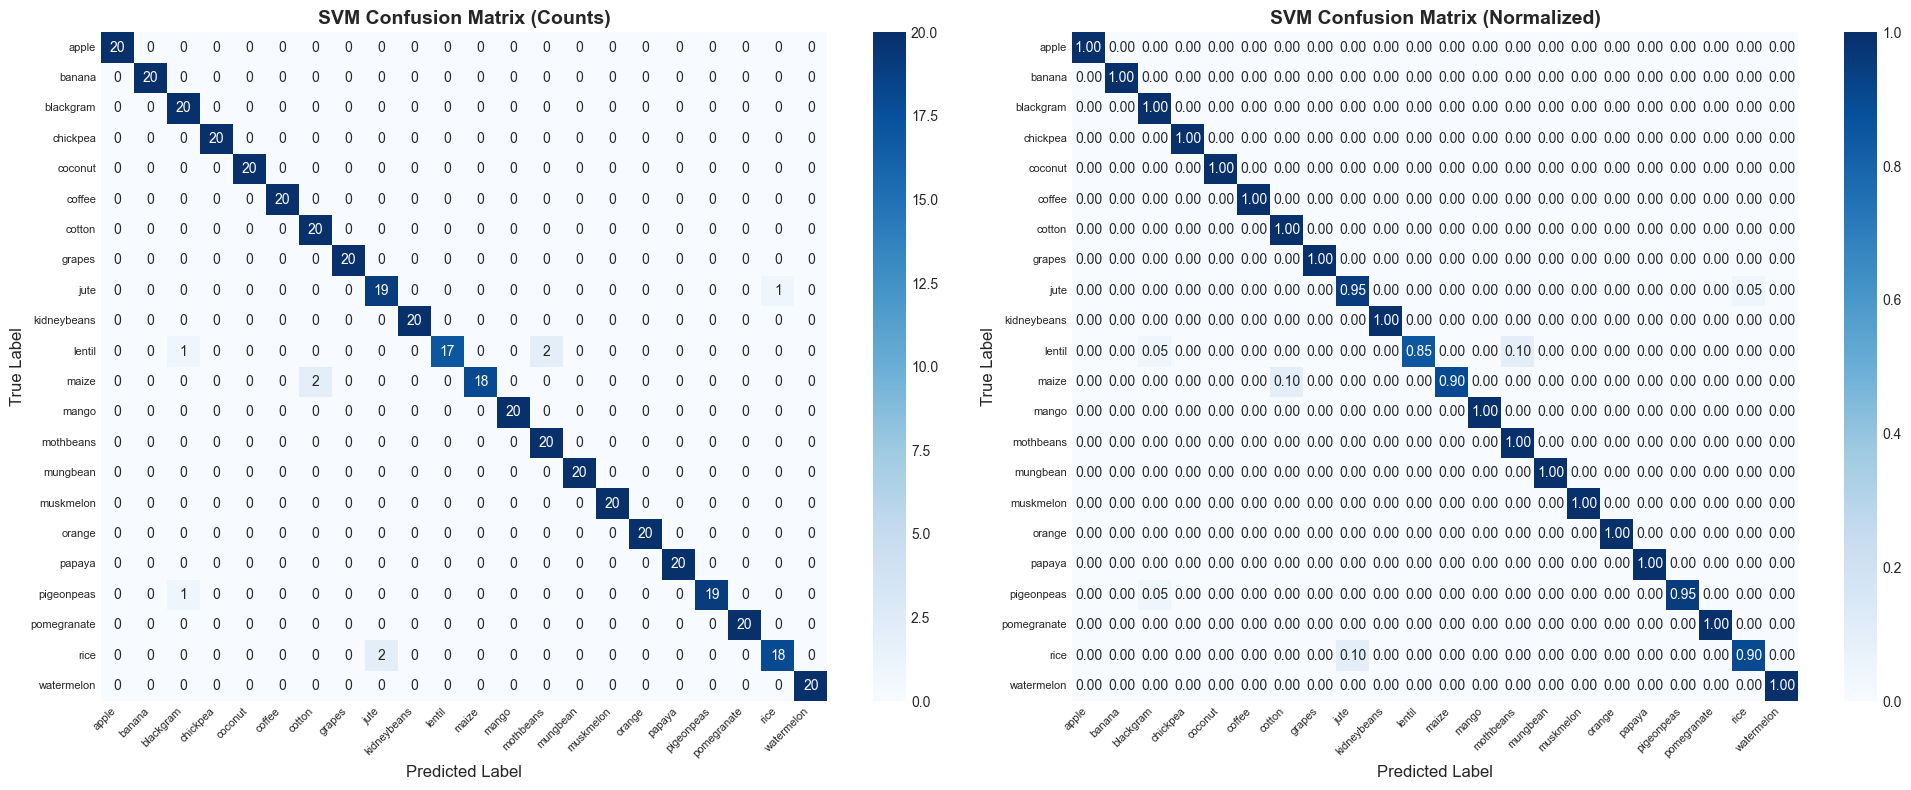

Confusion matrix saved to: ../data/visualizations/40_svm_confusion_matrix.png


In [73]:
print("CONFUSION MATRIX VISUALIZATION")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,ax=axes[0])
axes[0].set_title('SVM Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].tick_params(axis='both', labelsize=8)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Normalized
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_,ax=axes[1])
axes[1].set_title('SVM Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].tick_params(axis='both', labelsize=8)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../data/visualizations/40_svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix saved to: ../data/visualizations/40_svm_confusion_matrix.png")

# 10. Support Vectors Analysis

In [74]:

print("SUPPORT VECTORS ANALYSIS")

print(f"Total Support Vectors: {best_svm.n_support_.sum()}")
print(f"   Percentage of training data: {best_svm.n_support_.sum()/len(y_train)*100:.2f}%")

print("\nSupport Vectors per Class:")
sv_per_class = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Support Vectors': best_svm.n_support_,
    'Percentage': (best_svm.n_support_ / best_svm.n_support_.sum() * 100).round(2)
})
print(sv_per_class.to_string(index=False))

SUPPORT VECTORS ANALYSIS
Total Support Vectors: 646
   Percentage of training data: 36.70%

Support Vectors per Class:
      Class  Support Vectors  Percentage
      apple               18        2.79
     banana               23        3.56
  blackgram               33        5.11
   chickpea               23        3.56
    coconut               29        4.49
     coffee               21        3.25
     cotton               24        3.72
     grapes               25        3.87
       jute               37        5.73
kidneybeans               24        3.72
     lentil               33        5.11
      maize               27        4.18
      mango               36        5.57
  mothbeans               42        6.50
   mungbean               28        4.33
  muskmelon               10        1.55
     orange               46        7.12
     papaya               36        5.57
 pigeonpeas               44        6.81
pomegranate               27        4.18
       rice         

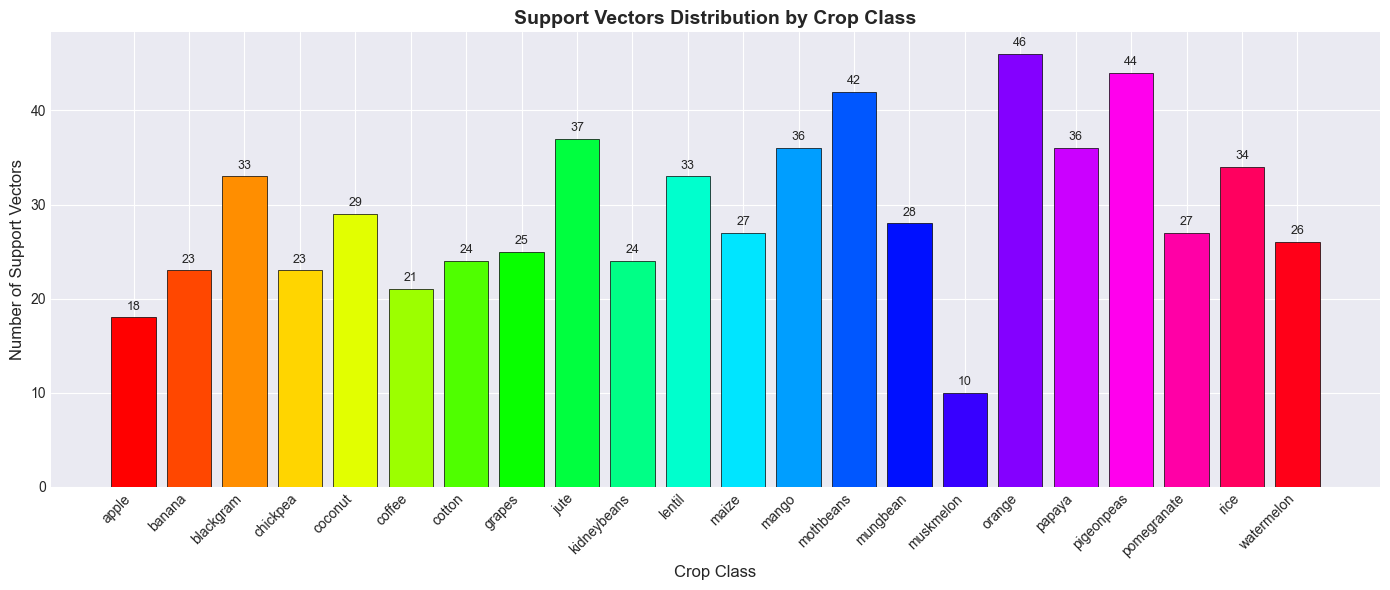

Support vectors plot saved to: ../data/visualizations/41_svm_support_vectors.png


In [75]:
# Visualize support vectors per class
fig, ax = plt.subplots(figsize=(14, 6))

colors = plt.cm.hsv(np.linspace(0, 1, len(label_encoder.classes_)))
bars = ax.bar(label_encoder.classes_, best_svm.n_support_, color=colors, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Crop Class', fontsize=12)
ax.set_ylabel('Number of Support Vectors', fontsize=12)
ax.set_title('Support Vectors Distribution by Crop Class', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, best_svm.n_support_):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../data/visualizations/41_svm_support_vectors.png', dpi=300, bbox_inches='tight')
plt.show()

print("Support vectors plot saved to: ../data/visualizations/41_svm_support_vectors.png")

# 11. Per-Class Performance Analysis

PER-CLASS PERFORMANCE ANALYSIS


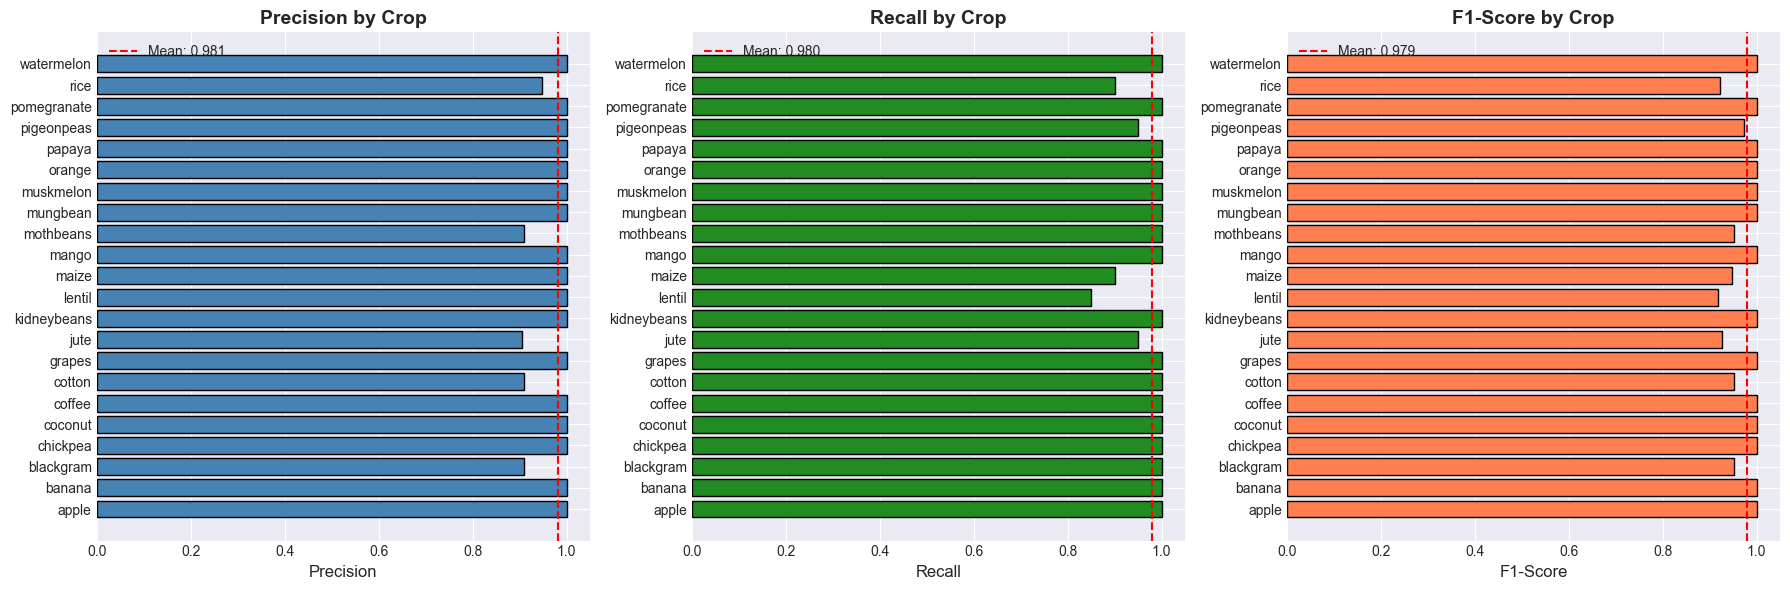

Per-class performance plot saved to: ../data/visualizations/42_svm_per_class_performance.png


In [76]:

print("PER-CLASS PERFORMANCE ANALYSIS")

# Create per-class performance visualization parattt
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Precision per class
precision_per_class = precision_score(y_test, y_test_pred, average=None, zero_division=0)
axes[0].barh(label_encoder.classes_, precision_per_class, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Precision', fontsize=12)
axes[0].set_title('Precision by Crop', fontsize=14, fontweight='bold')
axes[0].axvline(x=np.mean(precision_per_class), color='red', linestyle='--', label=f'Mean: {np.mean(precision_per_class):.3f}')
axes[0].legend()

# Recall per class
recall_per_class = recall_score(y_test, y_test_pred, average=None, zero_division=0)
axes[1].barh(label_encoder.classes_, recall_per_class, color='forestgreen', edgecolor='black')
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_title('Recall by Crop', fontsize=14, fontweight='bold')
axes[1].axvline(x=np.mean(recall_per_class), color='red', linestyle='--', label=f'Mean: {np.mean(recall_per_class):.3f}')
axes[1].legend()

# F1-Score per class
f1_per_class = f1_score(y_test, y_test_pred, average=None, zero_division=0)
axes[2].barh(label_encoder.classes_, f1_per_class, color='coral', edgecolor='black')
axes[2].set_xlabel('F1-Score', fontsize=12)
axes[2].set_title('F1-Score by Crop', fontsize=14, fontweight='bold')
axes[2].axvline(x=np.mean(f1_per_class), color='red', linestyle='--', label=f'Mean: {np.mean(f1_per_class):.3f}')
axes[2].legend()

plt.tight_layout()
plt.savefig('../data/visualizations/42_svm_per_class_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Per-class performance plot saved to: ../data/visualizations/42_svm_per_class_performance.png")

In [77]:
# Identify best and difficult classes
print("BEST PERFORMING CLASSES (F1-Score):")
class_performance = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
}).sort_values('F1-Score', ascending=False)

print("\nTop 5 classes:")
print(class_performance.head().to_string(index=False))

print("\nCLASSES NEEDING IMPROVEMENT:")
print(class_performance.tail(5).to_string(index=False))

BEST PERFORMING CLASSES (F1-Score):

Top 5 classes:
   Class  Precision  Recall  F1-Score
   apple        1.0     1.0       1.0
  banana        1.0     1.0       1.0
chickpea        1.0     1.0       1.0
 coconut        1.0     1.0       1.0
  coffee        1.0     1.0       1.0

CLASSES NEEDING IMPROVEMENT:
    Class  Precision  Recall  F1-Score
mothbeans   0.909091    1.00  0.952381
    maize   1.000000    0.90  0.947368
     jute   0.904762    0.95  0.926829
     rice   0.947368    0.90  0.923077
   lentil   1.000000    0.85  0.918919


# 12. Prediction Confidence Analysis

In [78]:

print("PREDICTION CONFIDENCE ANALYSIS")
# Calculate confidence scores
confidence_scores = np.max(y_test_pred_proba, axis=1) * 100

# Confidence for correct vs incorrect predictions
correct_mask = y_test == y_test_pred
correct_confidence = confidence_scores[correct_mask]
incorrect_confidence = confidence_scores[~correct_mask]

print(f"Confidence Statistics:")
print(f"Overall mean confidence: {np.mean(confidence_scores):.2f}%")
print(f"Correct predictions mean: {np.mean(correct_confidence):.2f}%")
if len(incorrect_confidence) > 0:
    print(f"Incorrect predictions mean: {np.mean(incorrect_confidence):.2f}%")
print(f"Min confidence: {np.min(confidence_scores):.2f}%")
print(f"Max confidence: {np.max(confidence_scores):.2f}%")

PREDICTION CONFIDENCE ANALYSIS
Confidence Statistics:
Overall mean confidence: 88.27%
Correct predictions mean: 88.99%
Incorrect predictions mean: 53.80%
Min confidence: 25.65%
Max confidence: 98.48%


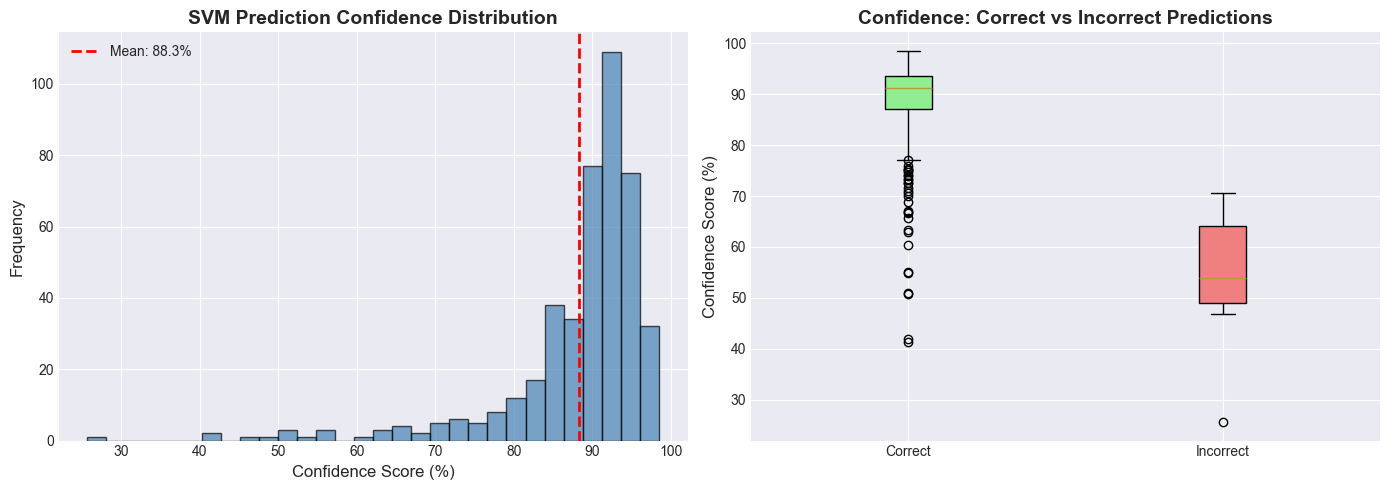

Confidence distribution saved to: ../data/visualizations/43_svm_confidence_distribution.png


In [79]:
# Plot confidence distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(confidence_scores, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=np.mean(confidence_scores), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {np.mean(confidence_scores):.1f}%')
axes[0].set_xlabel('Confidence Score (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('SVM Prediction Confidence Distribution', fontsize=14, fontweight='bold')
axes[0].legend()

# Box plot comparing correct vs incorrect
if len(incorrect_confidence) > 0:
    data_to_plot = [correct_confidence, incorrect_confidence]
    bp = axes[1].boxplot(data_to_plot, labels=['Correct', 'Incorrect'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
else:
    bp = axes[1].boxplot([correct_confidence], labels=['Correct'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    
axes[1].set_ylabel('Confidence Score (%)', fontsize=12)
axes[1].set_title('Confidence: Correct vs Incorrect Predictions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/visualizations/43_svm_confidence_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confidence distribution saved to: ../data/visualizations/43_svm_confidence_distribution.png")

# 13. Model Summary and Save

In [80]:

print("SVM MODEL SUMMARY")

summary = {
    'Model':'Support Vector Machine',
    'Kernel': best_svm.kernel,
    'C (Regularization)': best_svm.C,
    'Gamma': best_svm.gamma if hasattr(best_svm, 'gamma') else 'N/A',
    'Train Accuracy': f'{train_accuracy*100:.2f}%',
    'Test Accuracy': f'{test_accuracy*100:.2f}%',
    'Test Precision': f'{test_precision*100:.2f}%',
    'Test Recall': f'{test_recall*100:.2f}%',
    'Test F1-Score': f'{test_f1*100:.2f}%',
    'Overfitting Gap': f'{accuracy_diff*100:.2f}%',
    'Total Support Vectors': best_svm.n_support_.sum(),
    'Training Time (GridSearch)': f'{grid_search_time:.2f}s'
}

print("\nModel Configuration:")
for key, value in summary.items():
    print(f"   • {key}: {value}")

SVM MODEL SUMMARY

Model Configuration:
   • Model: Support Vector Machine
   • Kernel: rbf
   • C (Regularization): 100
   • Gamma: 0.01
   • Train Accuracy: 99.43%
   • Test Accuracy: 97.95%
   • Test Precision: 98.09%
   • Test Recall: 97.95%
   • Test F1-Score: 97.94%
   • Overfitting Gap: 1.48%
   • Total Support Vectors: 646
   • Training Time (GridSearch): 19.03s


In [81]:
# Save summary to CSV
summary_df = pd.DataFrame([{
    'Metric': 'Test Accuracy',
    'Value': f'{test_accuracy*100:.2f}%'
}, {
    'Metric': 'Test Precision',
    'Value': f'{test_precision*100:.2f}%'
}, {
    'Metric': 'Test Recall',
    'Value': f'{test_recall*100:.2f}%'
}, {
    'Metric': 'Test F1-Score',
    'Value': f'{test_f1*100:.2f}%'
}, {
    'Metric': 'Train Accuracy',
    'Value': f'{train_accuracy*100:.2f}%'
}, {
    'Metric': 'Overfitting Gap',
    'Value': f'{accuracy_diff*100:.2f}%'
}, {
    'Metric': 'Kernel',
    'Value': best_svm.kernel
}, {
    'Metric': 'C Parameter',
    'Value': str(best_svm.C)
}, {
    'Metric': 'Support Vectors',
    'Value': str(best_svm.n_support_.sum())
}])

summary_df.to_csv('../data/results/svm_summary.csv', index=False)
print("\nSummary saved to: ../data/results/svm_summary.csv")


Summary saved to: ../data/results/svm_summary.csv


In [82]:
# Save the model
print("SAVING SVM MODEL...")

with open('../models/svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)

print("Model saved to: ../models/svm_model.pkl")

# Verify saved model
import os
model_size = os.path.getsize('../models/svm_model.pkl') / 1024
print(f"   Model size: {model_size:.2f} KB")

SAVING SVM MODEL...
Model saved to: ../models/svm_model.pkl
   Model size: 314.94 KB


In [83]:
# Save predictions for comparison
predictions_df = pd.DataFrame({ 'True_Label_Encoded': y_test,
    'Predicted_Label_Encoded': y_test_pred,
    'True_Label': [label_encoder.classes_[i] for i in y_test],
    'Predicted_Label': [label_encoder.classes_[i] for i in y_test_pred],
    'Confidence': confidence_scores,
    'Correct': correct_mask
})

predictions_df.to_csv('../data/results/svm_predictions.csv', index=False)
print("Predictions saved to: ../data/results/svm_predictions.csv")

Predictions saved to: ../data/results/svm_predictions.csv


# 14. Update Model Comparison

In [84]:
print("UPDATING MODEL COMPARISON")

# Load existing comparison if exists
try:
    comparison_df = pd.read_csv('../data/results/model_comparison_all.csv')
    print("\n📋 Existing models in comparison:")
    print(comparison_df['Metric'].tolist() if 'Metric' in comparison_df.columns else "Found comparison file")
except:
    comparison_df = None
    print("\nNo existing comparison file found. Creating new one.")

# Create new comparison including SVM
new_comparison = {
    'Metric': ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 
               'Training Time (sec)', 'Prediction Time (ms)', 'Overfitting Gap'],
    'SVM': [f'{test_accuracy*100:.2f}%', f'{test_precision*100:.2f}%', 
            f'{test_recall*100:.2f}%', f'{test_f1*100:.2f}%',
            f'{grid_search_time:.4f}', f'{test_pred_time/len(y_test)*1000:.4f}',
            f'{accuracy_diff*100:.2f}%']
}

if comparison_df is not None and 'Logistic_Regression' in comparison_df.columns:
    comparison_df['SVM'] = new_comparison['SVM']
else:
    comparison_df = pd.DataFrame(new_comparison)

comparison_df.to_csv('../data/results/model_comparison_all.csv', index=False)
print("\nModel comparison updated: ../data/results/model_comparison_all.csv")
print("\n")
print(comparison_df.to_string(index=False))

UPDATING MODEL COMPARISON

📋 Existing models in comparison:
['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 'Training Time (sec)', 'Prediction Time (ms)', 'Overfitting Gap']

Model comparison updated: ../data/results/model_comparison_all.csv


              Metric Logistic_Regression Decision_Tree Random_Forest     SVM
       Test Accuracy              97.73%        95.68%        99.32%  97.95%
      Test Precision              97.93%        95.92%        99.35%  98.09%
         Test Recall              97.73%        95.68%        99.32%  97.95%
       Test F1-Score              97.71%        95.70%        99.32%  97.94%
 Training Time (sec)              0.2027        0.0194        0.3761 19.0283
Prediction Time (ms)              0.0028        0.0042        0.2568  0.1586
     Overfitting Gap               1.14%         1.88%         0.57%   1.48%
